In [1]:
from sklearn.datasets import load_digits

In [2]:
data = load_digits()

In [7]:
X = data.data
y = data.target

In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.cross_validation import cross_val_score

In [21]:
cls = DecisionTreeClassifier()
scores = cross_val_score(cls, X, y, cv = 10)
tree_score = scores.mean()
print tree_score

0.828664807703


In [16]:
def write_to_file(num, ans):
    with open(str(num)+".txt", "w") as f:
        f.write(str(ans))

In [17]:
write_to_file(1, scores.mean())

In [18]:
from sklearn.ensemble import BaggingClassifier

In [24]:
bag_cls = BaggingClassifier(base_estimator=cls, n_estimators=100)
scores = cross_val_score(bag_cls, X, y, cv = 10)
bag_score = scores.mean()
print bag_score
write_to_file(2, bag_score)

0.928730697021


In [25]:
import numpy as np
bag_cls_d = BaggingClassifier(base_estimator=cls, n_estimators=100, max_features=int(np.sqrt(X.shape[1])))
scores = cross_val_score(bag_cls_d, X, y, cv = 10)
bag_score_d = scores.mean()
print bag_score_d
write_to_file(3, bag_score_d)

0.936051889002


In [26]:
cls_d = DecisionTreeClassifier(max_features='sqrt')
bag_cls_d2 = BaggingClassifier(base_estimator=cls_d, n_estimators=100)
scores = cross_val_score(bag_cls_d2, X, y, cv = 10)
bag_score_d2 = scores.mean()
print bag_score_d2
write_to_file(4, bag_score_d2)

0.951162185476


In [27]:
from sklearn.ensemble import RandomForestClassifier

In [28]:
rf_cls = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(rf_cls, X, y, cv = 10)
rf_score = scores.mean()
print rf_score

0.951693111731


In [37]:
import matplotlib.pyplot as plt
%matplotlib inline

In [36]:
num_trees = np.array([10, 50, 100, 200, 500, 1000])
mean_scores = np.zeros(num_trees.shape)
for i, num in enumerate(num_trees):
    rf_cls_t = RandomForestClassifier(n_estimators=num)
    scores = cross_val_score(rf_cls_t, X, y, cv = 10)
    mean_scores[i] = scores.mean()

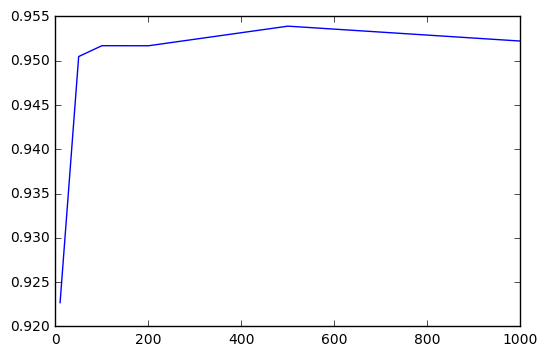

In [38]:
plt.plot(num_trees, mean_scores)

In [39]:
X.shape

(1797L, 64L)

In [41]:
num_features = np.array([5, 10, 20, 30, 40, 50, 60])
mean_scores = np.zeros(num_features.shape)
for i, num in enumerate(num_features):
    rf_cls_t = RandomForestClassifier(n_estimators=100, max_features=num)
    scores = cross_val_score(rf_cls_t, X, y, cv = 10)
    mean_scores[i] = scores.mean()

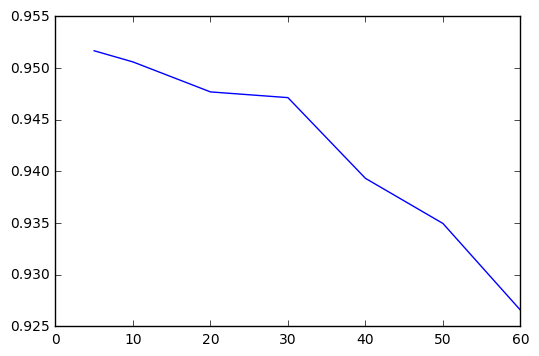

In [42]:
plt.plot(num_features, mean_scores)

In [43]:
depths = np.array([5, 10, 20, None])
mean_scores = np.zeros(depths.shape)
for i, num in enumerate(depths):
    rf_cls_t = RandomForestClassifier(n_estimators=100, max_depth=num)
    scores = cross_val_score(rf_cls_t, X, y, cv = 10)
    mean_scores[i] = scores.mean()

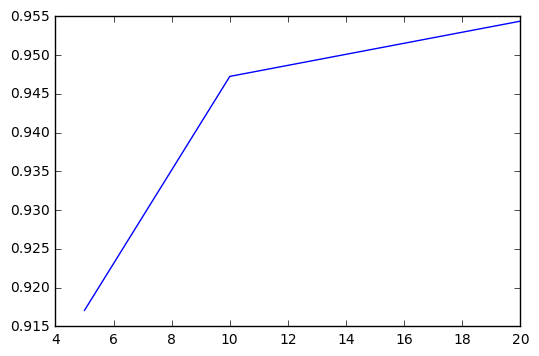

In [44]:
plt.plot(depths, mean_scores)

In [ ]:
ANswer:
NO: 1 5 6
Yes: 2 3 4 7

In [45]:
write_to_file(5, "2 3 4 7")